In [35]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [3]:
# load the data call (dir, shuffle, imgsize. batchsize)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "Plant Village",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [4]:
# check the class names (folder names)
class_names = dataset.class_names

In [5]:
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [6]:
len(dataset)

78

In [7]:
32*78

2496

In [8]:
# Check for the shape of the batch convert label batch to numpy as its in tensor dataset
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0]


In [9]:
# print the firstimage every numnber is between 0, 255
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[128., 112., 112.],
        [136., 120., 120.],
        [123., 107., 107.],
        ...,
        [135., 117., 115.],
        [129., 111., 109.],
        [128., 110., 108.]],

       [[136., 120., 120.],
        [145., 129., 129.],
        [135., 119., 119.],
        ...,
        [137., 119., 117.],
        [134., 116., 114.],
        [135., 117., 115.]],

       [[126., 110., 110.],
        [138., 122., 122.],
        [138., 122., 122.],
        ...,
        [142., 124., 122.],
        [142., 124., 122.],
        [145., 127., 125.]],

       ...,

       [[142., 136., 140.],
        [144., 138., 142.],
        [158., 152., 156.],
        ...,
        [129., 118., 126.],
        [126., 115., 123.],
        [126., 115., 123.]],

       [[133., 127., 131.],
        [137., 131., 135.],
        [163., 157., 161.],
        ...,
        [135., 124., 132.],
        [136., 125., 133.],
       

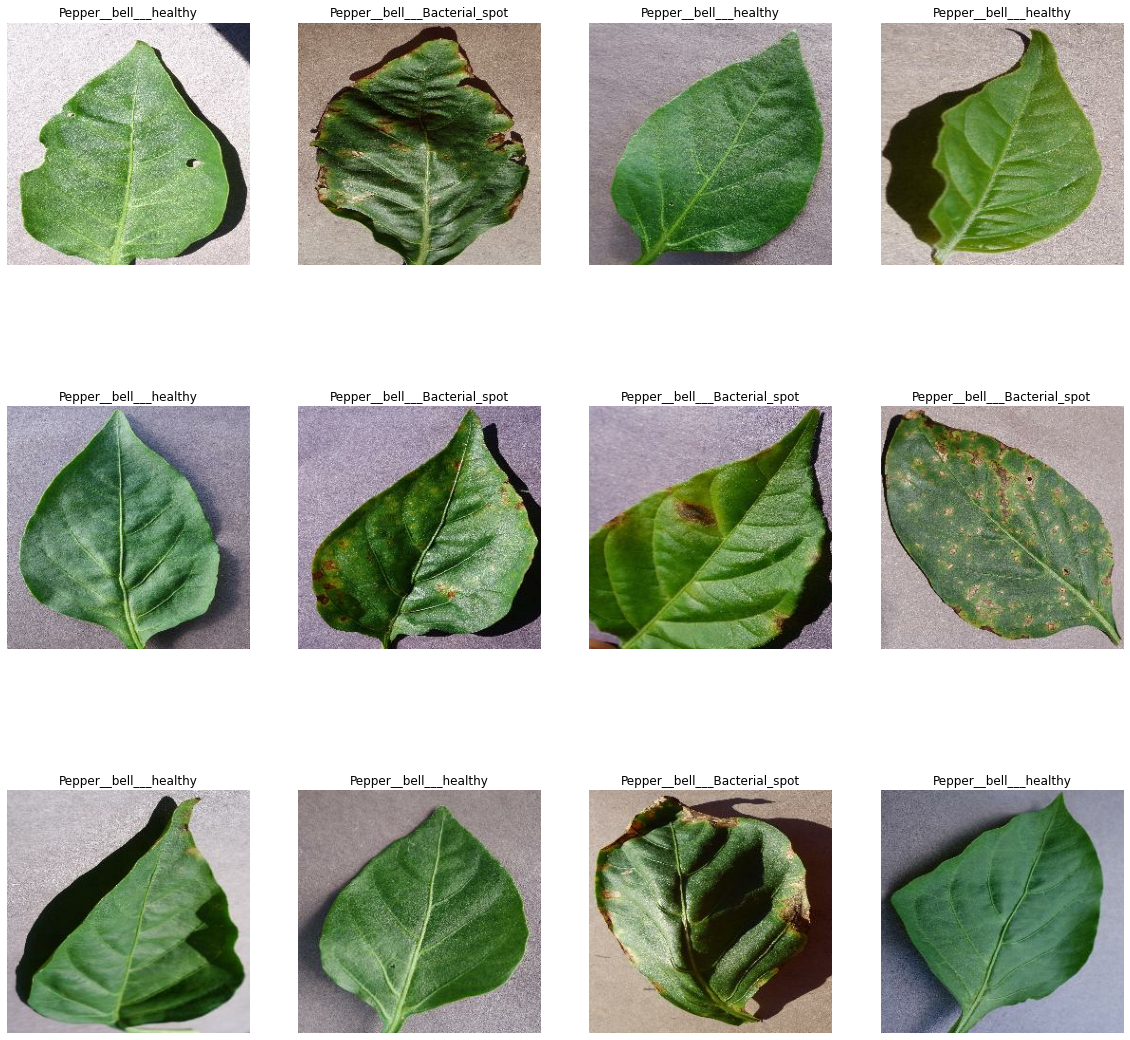

In [46]:
# visualize this image range_value should be equal to the subplot size 
range_value = 12
plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1):
    for i in range(range_value):
        # to show the batch create a subplot
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        # remove the axis
        plt.axis("off")
        # display the title
        plt.title(class_names[label_batch[i]])

In [11]:
# 80% ==> training
# 10% ==> validation
# 10% ==> test
# sample space = 2496
# 78 * 0.8 = 64.2 batch is train dataset
training_size = 0.8
train_ds = dataset.take(62)

In [12]:
# slice the first 64 to get the remaning ds
test_ds = dataset.skip(62)

In [13]:
# 78 * 0.1 = 7.8 batches 
val_size = 0.1
val_ds = test_ds.take(7)
len(val_ds)

7

In [14]:
act_test_ds = test_ds.skip(50)

In [15]:
# Get ds methods
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    # get sizes
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    test_size = int(ds_size*test_split)

    # get ds
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size).take(test_size)

    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

62

In [18]:
len(val_ds)

7

In [19]:
len(test_ds)

7

In [20]:
# preprocessing pipeline
# scale the image
# resizing
# make the maodel robust by normalizing the image using data augmentation
# data augmentation is used to create new samples by rotation, horizontal and vertical flip, contrast, zoom
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
# data augmentation is used to create new samples by rotation, horizontal and vertical flip, contrast, zoom
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
# build layers
# filters and kernal size
# Conv2D (filterbatch, (filtersize-x, filtersize-y), activation layer, Imagesize) 
# pooling layers 
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
# compile the model using adam optimizer

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [25]:
# Training using EPOCHS = 50
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
62/62 [==============================] - 91s 1s/step - loss: 0.7342 - accuracy: 0.6295 - val_loss: 0.3268 - val_accuracy: 0.8973
Epoch 2/50
62/62 [==============================] - 90s 1s/step - loss: 0.3159 - accuracy: 0.8760 - val_loss: 0.4829 - val_accuracy: 0.9241
Epoch 3/50
62/62 [==============================] - 89s 1s/step - loss: 0.2234 - accuracy: 0.9429 - val_loss: 0.5283 - val_accuracy: 0.7545
Epoch 4/50
62/62 [==============================] - 88s 1s/step - loss: 0.1475 - accuracy: 0.9516 - val_loss: 0.5441 - val_accuracy: 0.7991
Epoch 5/50
62/62 [==============================] - 88s 1s/step - loss: 0.1093 - accuracy: 0.9694 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 6/50
62/62 [==============================] - 89s 1s/step - loss: 0.1140 - accuracy: 0.9669 - val_loss: 0.1365 - val_accuracy: 0.9375
Epoch 7/50
62/62 [==============================] - 88s 1s/step - loss: 0.0730 - accuracy: 0.9806 - val_loss: 0.1636 - val_accuracy: 0.9509
Epoch 8/50
62/62 [==

In [26]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 3s 324ms/step - loss: 0.0240 - accuracy: 0.9955


In [27]:
scores

[0.023997372016310692, 0.9955357313156128]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 62}

In [29]:
history.history['accuracy']

[0.6295362710952759,
 0.8760080933570862,
 0.9429444670677185,
 0.9516046643257141,
 0.9694345593452454,
 0.9668874144554138,
 0.9806419014930725,
 0.9838709831237793,
 0.9943963289260864,
 0.9943963289260864,
 0.9887926578521729,
 0.9959245920181274,
 0.9959245920181274,
 0.9954637289047241,
 0.9903209209442139,
 0.9913398027420044,
 0.9923586249351501,
 0.9964340329170227,
 0.9939516186714172,
 0.9939516186714172,
 0.9894153475761414,
 0.9974528551101685,
 0.9949057698249817,
 0.9954637289047241,
 0.998471736907959,
 0.9923586249351501,
 0.9964717626571655,
 0.9959677457809448,
 0.9954637289047241,
 0.9943963289260864,
 0.998471736907959,
 0.9938868880271912,
 0.9899193644523621,
 0.9938868880271912,
 0.9893020987510681,
 0.9857361316680908,
 0.9943963289260864,
 0.9979622960090637,
 0.9964340329170227,
 0.9933775067329407,
 0.9979622960090637,
 0.998471736907959,
 0.9923586249351501,
 0.9717742204666138,
 0.9857361316680908,
 0.9933775067329407,
 0.9933775067329407,
 0.9959245920181

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

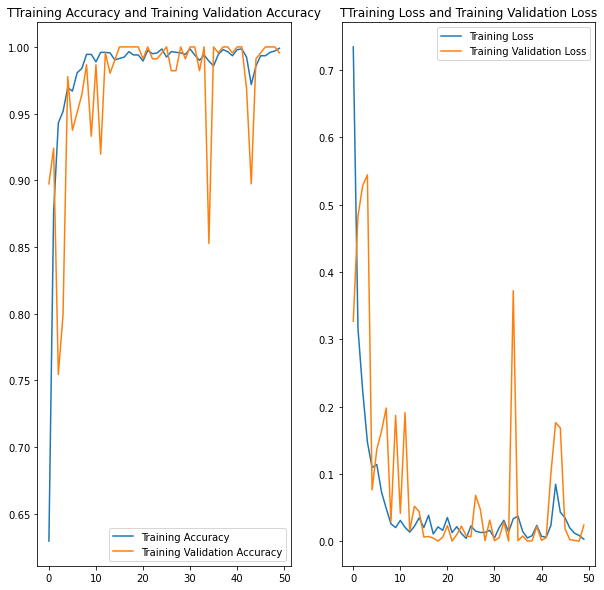

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Training Validation Accuracy')
plt.legend(loc='lower right')
plt.title('TTraining Accuracy and Training Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Training Validation Loss')
plt.legend(loc='upper right')
plt.title('TTraining Loss and Training Validation Loss')
plt.show()

Print first image to predict: 
actual label:  Pepper__bell___Bacterial_spot
prediction label:  Pepper__bell___Bacterial_spot


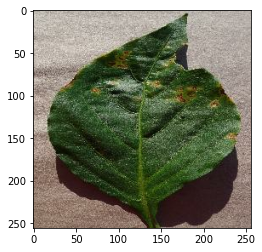

In [47]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('Print first image to predict: ')
    plt.imshow(first_image)
    print('actual label: ', class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('prediction label: ', class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # batch creation
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

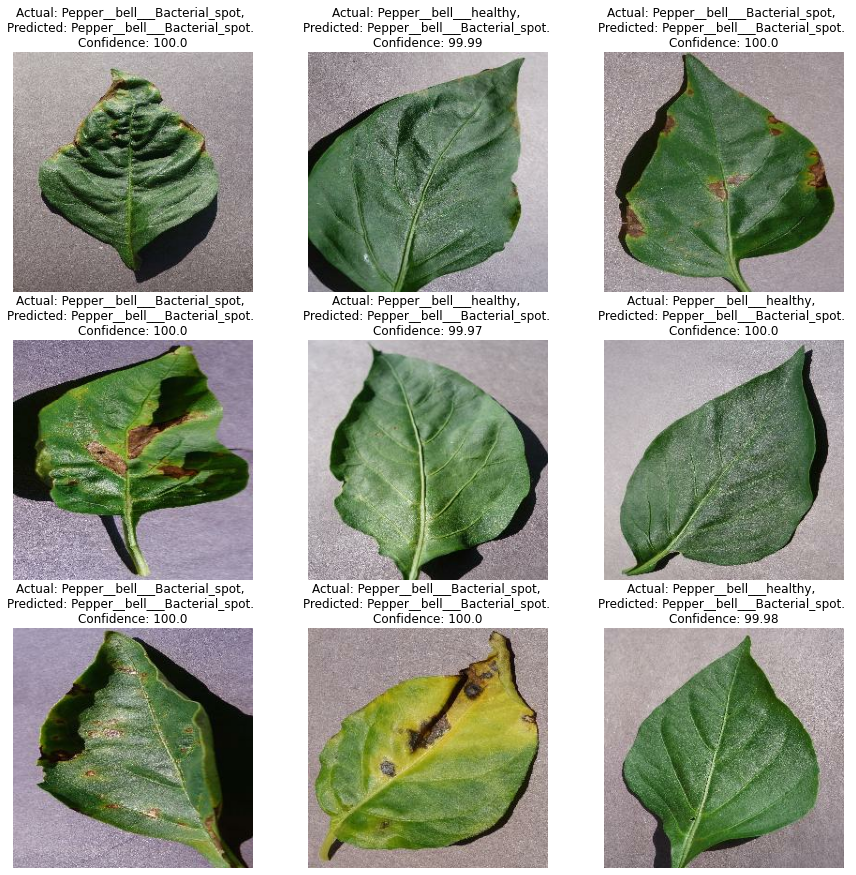

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}. \nConfidence: {confidence}")
        
        
        plt.axis("off")

In [41]:
# extract the model and save it as a file
import os
model_version = max([int(i) for i in os.listdir("../models_bell_pepper") + [0]])+1
model.save(f"../models_bell_pepper/{model_version}")

INFO:tensorflow:Assets written to: ../models_bell_pepper/1\assets
